<h1> <center> 5 - Member Votes </center> </h1> 

**Authors:** Sebastião Rosalino, Flávio Pinheiro, António Curado

# Table of Contents

1. [Exporting Dataset](#Exporting-Dataset)

In [1]:
# Import the necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import numpy as np

from matplotlib.ticker import ScalarFormatter

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the member_votes dataset
member_votes = pd.read_csv('../datasets/first_stage/member_votes.csv')

In [3]:
# Load the id_mep_mapping variable for new MEP-ID assignment
with open('../datasets/second_stage/2_members/id_mep_mapping.pkl', 'rb') as f:
    id_mep_mapping = pickle.load(f)

In [4]:
# Load the id_bill_mapping variable for new bill-ID assignment
with open('../datasets/second_stage/4_bills/id_bill_mapping.pkl', 'rb') as f:
    id_bill_mapping = pickle.load(f)

In [5]:
# Check the shape (number of rows and number of features) of the member_votes dataset
print(f'member_votes number of rows: {member_votes.shape[0]}')
print(f'member_votes number of features: {member_votes.shape[1]}')

member_votes number of rows: 13571176
member_votes number of features: 5


In [6]:
# Check the structural information of the member_votes dataset, including column names, non-null counts, datatypes and size
member_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13571176 entries, 0 to 13571175
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   vote_id       int64 
 1   member_id     int64 
 2   position      object
 3   country_code  object
 4   group_code    object
dtypes: int64(2), object(3)
memory usage: 517.7+ MB


In [7]:
# Since the member_votes dataset's size is too large, it was not possible to get the non-null count per column. As a result, let's retrieve that information now
member_votes.isna().sum()

vote_id         0
member_id       0
position        0
country_code    0
group_code      0
dtype: int64

In [8]:
# Check for duplicated rows in the member_votes dataset
duplicates = member_votes.duplicated()

# Display the count of duplicated rows
print(f"Number of duplicated rows in member_votes: {duplicates.sum()}")

Number of duplicated rows in member_votes: 0


In [9]:
# Visualize the member_votes dataset
member_votes

,vote_id,member_id,position,country_code,group_code
0,108425,840,DID_NOT_VOTE,LUX,RENEW
1,108425,1394,AGAINST,GBR,RENEW
2,108425,1854,ABSTENTION,DEU,SD
3,108425,1909,ABSTENTION,DEU,SD
4,108425,1913,ABSTENTION,DEU,SD
...,...,...,...,...,...
13571171,169252,254719,DID_NOT_VOTE,PRT,EPP
13571172,169252,254720,DID_NOT_VOTE,PRT,EPP
13571173,169252,254721,DID_NOT_VOTE,PRT,EPP
13571174,169252,254722,FOR,PRT,EPP


In [10]:
# Replace the member_id in member_votes with the previously created id_mep_mapping mapping
member_votes['id_mep'] = member_votes['member_id'].map(id_mep_mapping)

# Remove the old "member_id" column
member_votes.drop("member_id", inplace=True, axis=1)

# Display the updated dataset to verify the changes
member_votes

,vote_id,position,country_code,group_code,id_mep
0,108425,DID_NOT_VOTE,LUX,RENEW,0
1,108425,AGAINST,GBR,RENEW,1
2,108425,ABSTENTION,DEU,SD,2
3,108425,ABSTENTION,DEU,SD,4
4,108425,ABSTENTION,DEU,SD,5
...,...,...,...,...,...
13571171,169252,DID_NOT_VOTE,PRT,EPP,868
13571172,169252,DID_NOT_VOTE,PRT,EPP,869
13571173,169252,DID_NOT_VOTE,PRT,EPP,870
13571174,169252,FOR,PRT,EPP,871


In [11]:
# Replace the vote_id in member_votes with the previously created id_bill_mapping mapping
member_votes['id_bill'] = member_votes['vote_id'].map(id_bill_mapping)

# Remove the bills whose id_bill was not assigned in the mapping conversion, as those are non-interesting bills as explained in 4_bills.ipynb
member_votes = member_votes.dropna(subset=['id_bill'])

# Convert the id_bill column to integer type
member_votes['id_bill'] = member_votes['id_bill'].astype('int64')

# Remove the old "vote_id" column
member_votes.drop("vote_id", inplace=True, axis=1)

# Display the updated dataset to verify the changes
member_votes

,position,country_code,group_code,id_mep,id_bill
2253,FOR,LUX,RENEW,0,0
2254,FOR,GBR,RENEW,1,0
2255,DID_NOT_VOTE,DEU,SD,2,0
2256,FOR,DEU,SD,4,0
2257,FOR,DEU,SD,5,0
...,...,...,...,...,...
13571171,DID_NOT_VOTE,PRT,EPP,868,1902
13571172,DID_NOT_VOTE,PRT,EPP,869,1902
13571173,DID_NOT_VOTE,PRT,EPP,870,1902
13571174,FOR,PRT,EPP,871,1902


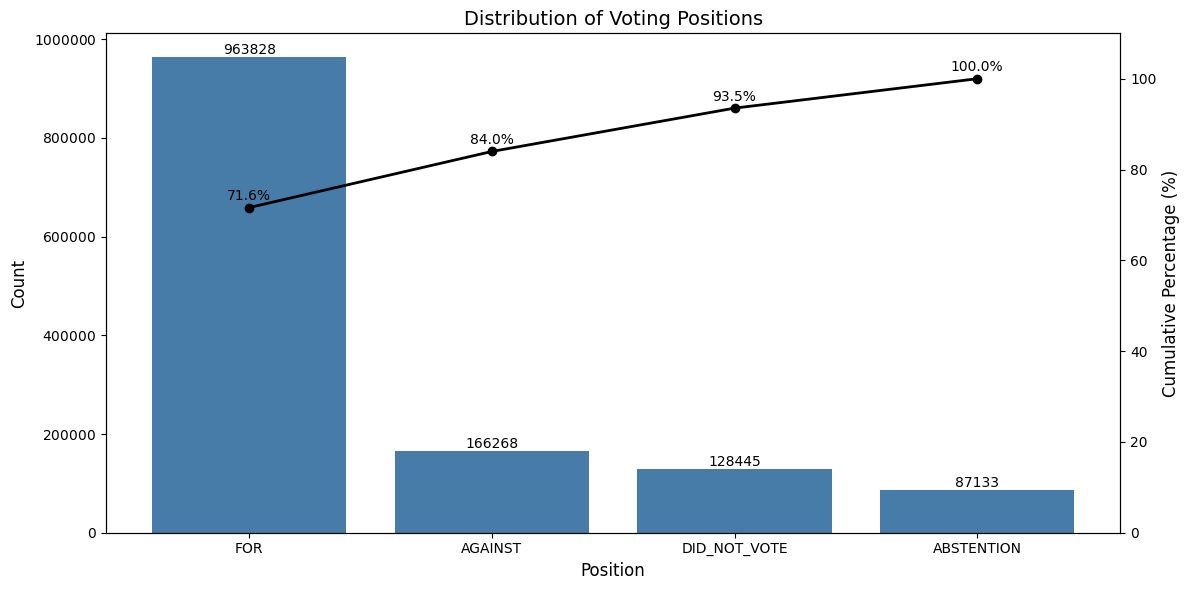

In [12]:
# Calculate the voting positions counts and cumulative percentages
position_counts = member_votes['position'].value_counts()
position_order = position_counts.index
cumulative_percentage = np.cumsum(position_counts) / position_counts.sum() * 100

# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar chart
sns.barplot(x=position_order, y=position_counts, ax=ax1, color="#377eb8")
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Position', fontsize=12)
ax1.set_title('Distribution of Voting Positions', fontsize=14)

# Add counts on top of each bar
for i, count in enumerate(position_counts):
    ax1.annotate(f'{int(count)}', 
                 (i, count), 
                 ha='center', va='bottom', fontsize=10)

# Set plain formatting for the y-axis
ax1.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
ax1.yaxis.get_major_formatter().set_scientific(False)

# Create a second y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(position_order, cumulative_percentage, color='black', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=12)
ax2.set_ylim(0, 110)

# Add annotations for the cumulative percentage points
for i, percentage in enumerate(cumulative_percentage):
    ax2.annotate(f'{percentage:.1f}%', 
                 (i, percentage + 1), 
                 ha='center', va='bottom', fontsize=10, color='black')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

## 1. Exporting Dataset
<a id="Exporting-Dataset"></a>

In [13]:
# Export the member_votes dataset in its current stage to the corresponding local folder
member_votes.to_csv("../datasets/second_stage/5_member_votes/member_votes.csv", index=False)